In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

For an initial condition $\zeta(r,0) = 2 e^{-(r/a)^2}$, $\zeta_t(r,0) = 0$, the analytical solution of Carrier (1991) according to Cho (1995) is

$$\zeta(r,t) = \int_0 ^ \infty a^2 e^{-(ak)^2}k cos \left( 
\frac{\sqrt{gh}kt}{1+\frac{(kh)^2}{3}}\right)
J_0 (kr)
dk$$

Introducing the following dimensionless variables:

$$h' = \frac{h}{a}$$
$$ x' = \frac{x}{a}$$
$$ y' = \frac{y}{a}$$
$$ k' = ak$$
$$ t' = \frac{\sqrt{gh}}{a}t $$

the analytical solution becomes

$$\zeta(r,t) = \int_0 ^\infty k' e^{-(k')^2/4} \cos\left(
\frac{k't'}{\sqrt{1+\frac{(k'h')^2}{3}}}\right)
J_0(k'r') dk'
$$

In [2]:
from scipy.special import j0
from scipy.integrate import quad, quadrature, romberg

The following is to compute the integral as a limit of riemann sums

In [3]:
def integrand(k,r,t,h):
    return k*np.exp(-k*k*0.25)*np.cos(k*t/np.sqrt(1+(k*h)*(k*h)/3.))*j0(k*r)

def integral(k,r,t,h,dk):
    return np.sum(integrand(k,r,t,h)*dk)

def iterate_dk(r,t,h,itdk,kmax):
    dk = 2**(-itdk)
    k = np.arange(0,kmax,dk)    
    this_integral = integral(k,r,t,h,dk)
    return this_integral

def iterate_kmax(r,t,h,ndk,kmax,toldk,verb=False):
    
    integral_dk = np.zeros(ndk)
    
    integral_dk[0] = iterate_dk(r,t,h,0,kmax)    
    for itdk in range(1,ndk):    
        this_integral = iterate_dk(r,t,h,itdk,kmax)
        integral_dk[itdk] = this_integral
        err = np.abs(this_integral-integral_dk[itdk-1])
        if verb: print('\tIn dk (itdk,err) = ',itdk,',',err)
        if err < toldk:            
            return this_integral
    raise ValueError('something went wrong in dk loop: err=',err)

def solution(r, t, h, ndk=100, nkmax=30, toldk = 1e-15, tolkmax = 1e-15, verb=False): 
    ndk = 100
    nkmax = 20*3
    toldk = 1e-5
    tolkmax = 1e-5
    integral_kmax = np.zeros(nkmax)
    integral_kmax[0] = iterate_kmax(r,t,h,ndk,1,toldk)
    for itkmax,kmax in enumerate(range(2,nkmax)):
        integral_kmax[itkmax] = iterate_kmax(r,t,h,ndk,kmax,toldk,verb=verb)

        err = np.abs(integral_kmax[itkmax]-integral_kmax[itkmax-1])
        if verb: print('\nIn kmax (itkmax,err) =',itkmax,err)
        if err<tolkmax:
            return integral_kmax[itkmax]
    raise ValueError(' something went wrong in kmax loop: err=',err)

This was necessary because the integrand is really oscillatory

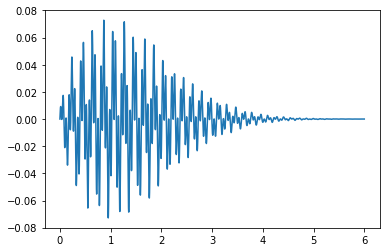

In [4]:
k =  np.linspace(0,6,100000)
plt.plot(k,integrand(k,r=70,t=40,h=0.2))

For an example case:

In [5]:
r = np.linspace(20,70,500)
zeta_t40 = np.vectorize(solution)(r,t=40,h=0.2)
zeta_t50 = np.vectorize(solution)(r,t=50,h=0.2)
zeta_t60 = np.vectorize(solution)(r,t=60,h=0.2)

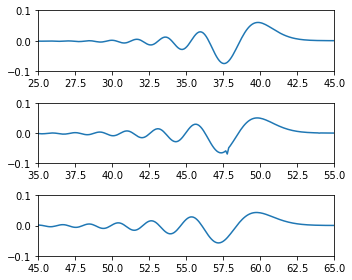

In [6]:
plt.subplot(311)
plt.plot(r,zeta_t40)
plt.xlim(25,45)
plt.ylim(-0.1,0.1)

plt.subplot(312)
plt.plot(r,zeta_t50)
plt.xlim(35,55)
plt.ylim(-0.1,0.1)

plt.subplot(313)
plt.plot(r,zeta_t60)
plt.xlim(45,65)
plt.ylim(-0.1,0.1)

plt.gcf().set_size_inches(5,4)
plt.tight_layout()
# plt.xlim(30,60)

# Numerical results

Here the parameters are
* a = 1
* h = 0.2
* xmax = 69.5

In [17]:
z = np.loadtxt('../tsunamilab/tlab2D',delimiter=',',skiprows=1).reshape((280,280))

In [18]:
a = 1
x = y = np.linspace(-70, 69.5, 280)
x,y = np.meshgrid(x,y)
rnum = np.sqrt(x*x+y*y)
dt_adim = 0.2*np.sqrt(9.81*0.2) # t*sqrt(gh)

Comparison at adimensional time $ t' = 40$, or dimensional time $t = t'a/\sqrt{gh_0} = $

In [19]:
40/np.sqrt(9.81*0.2)

28.556862458541289

(20, 45)

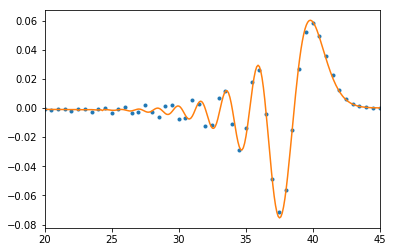

In [20]:
plt.plot(rnum[140:,140],z[140:,140],'.')
plt.plot(r,zeta_t40)
plt.xlim(20,45)